# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


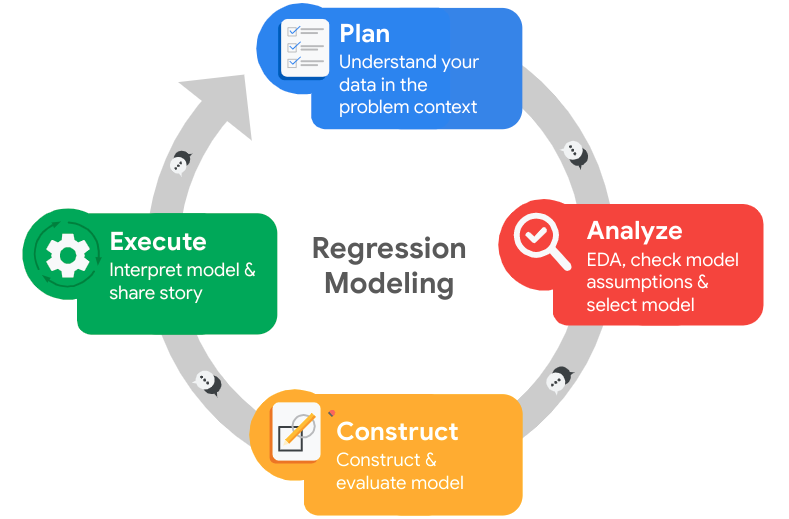

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
 # Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier  # Assuming decision tree is chosen; can change based on model selection
from sklearn.linear_model import LogisticRegression  # If logistic regression is chosen
from sklearn.preprocessing import StandardScaler, LabelEncoder




### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe

data = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe

# Initial data exploration
print(data.head())



   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data

print(data.describe())


       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names

data.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
#Convert all names to lowercase.
#Replace spaces with underscores.
#Correct any misspellings (e.g., 'average_montly_hours' should be 'average_monthly_hours').
#Ensure concise yet descriptive names.

# Rename columns as needed
### YOUR CODE HERE ###
data.columns = ['satisfaction_level', 'last_evaluation', 'number_of_projects',
                'average_monthly_hours', 'time_spent_at_company', 'work_accident', 
                'left_company', 'promotion_last_5years', 'department', 'salary']


# Display all column names after the update
### YOUR CODE HERE ###
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'time_spent_at_company', 'work_accident',
       'left_company', 'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
data.isna()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,time_spent_at_company,work_accident,left_company,promotion_last_5years,department,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


### Check duplicates

Check for any duplicate entries in the data.

In [11]:
# Check for duplicates
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 3008


In [12]:
if not duplicate_rows.empty:
    print("Sample duplicate rows:")
    print(duplicate_rows.head())

Sample duplicate rows:
      satisfaction_level  last_evaluation  number_of_projects  \
396                 0.46             0.57                   2   
866                 0.41             0.46                   2   
1317                0.37             0.51                   2   
1368                0.41             0.52                   2   
1461                0.42             0.53                   2   

      average_monthly_hours  time_spent_at_company  work_accident  \
396                     139                      3              0   
866                     128                      3              0   
1317                    127                      3              0   
1368                    132                      3              0   
1461                    142                      3              0   

      left_company  promotion_last_5years  department  salary  
396              1                      0       sales     low  
866              1                      0  

In [13]:
# Drop duplicates and save resulting dataframe in a new variable
data_clean = data.drop_duplicates()

# Display first few rows of new dataframe
print("First few rows of the dataframe after removing duplicates:")
print(data_clean.head())

First few rows of the dataframe after removing duplicates:
   satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   average_monthly_hours  time_spent_at_company  work_accident  left_company  \
0                    157                      3              0             1   
1                    262                      6              0             1   
2                    272                      4              0             1   
3                    223                      5              0             1   
4                    159                      3              0             1   

   promotion_last_5years department  salary  
0                      0      sales     l

### Check outliers

Check for outliers in the data.

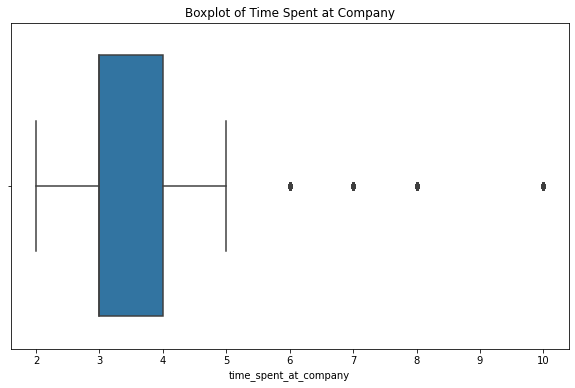

In [14]:
# Creating a boxplot for 'time_spent_at_company'
plt.figure(figsize=(10, 6))
sns.boxplot(data['time_spent_at_company'])
plt.title('Boxplot of Time Spent at Company')
plt.show()


In [16]:
# Calculating the Interquartile Range (IQR)
Q1 = data['time_spent_at_company'].quantile(0.25)
Q3 = data['time_spent_at_company'].quantile(0.75)
IQR = Q3 - Q1

# Determining outliers
outliers = data[(data['time_spent_at_company'] < (Q1 - 1.5 * IQR)) | (data['time_spent_at_company'] > (Q3 + 1.5 * IQR))]
outlier_count = outliers.shape[0]
print("Number of outliers:", outlier_count)


Number of outliers: 1282


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# Pace: Analyze Stage
- Perform EDA (analyze relationships between variables)

# Descriptive statistics
print(data_clean.describe())

# Univariate Analysis
# Histogram for 'satisfaction_level'
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['satisfaction_level'], kde=True)
plt.title('Distribution of Satisfaction Level')
plt.show()

# Bivariate Analysis
# Scatter plot for 'satisfaction_level' vs 'time_spent_at_company'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='time_spent_at_company', data=data_clean)
plt.title('Satisfaction Level vs Time Spent at Company')
plt.show()

# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(data_clean.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Grouped Analysis
# Average monthly hours by department
grouped_data = data_clean.groupby('department')['average_monthly_hours'].mean()
print(grouped_data)




💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Observations about Relationships Between Variables:

Look for patterns, trends, and anomalies between variables, such as whether higher satisfaction levels correlate with lower employee turnover.
Investigate if certain departments have higher turnover rates, or if longer time spent at the company affects employee satisfaction.
Assess if salary levels are adequately aligned with job satisfaction and employee retention.
Observations about Distributions in the Data:

Identify any skewness in the distribution of variables like satisfaction level or monthly hours.
Determine if the distribution of certain variables is normal, uniform, or skewed, which can impact the choice of statistical methods and models.
Spot any potential outliers in key variables that might need further examination or handling.
Data Transformations Made and Reasons:

Standardize or normalize numerical data if there are large differences in scales, which is essential for many machine learning models.
Encode categorical variables into numerical formats suitable for model input.
Impute or remove missing values based on their impact on the dataset and the chosen modeling approach.
Purposes of EDA Before Constructing a Predictive Model:

Identify patterns, anomalies, trends, and relationships that can inform feature selection and model building.
Ensure data quality by detecting and correcting errors or inconsistencies in the dataset.
Gain insights that can lead to hypotheses about the drivers of employee turnover.
Determine the need for data transformation or feature engineering to improve model performance.
Resources Used in This Stage:

Python libraries documentation (Pandas, Seaborn, Matplotlib, Scikit-learn) for data manipulation and visualization techniques.
Online forums and communities like Stack Overflow for troubleshooting and tips.
Educational resources or courses that provide guidelines on EDA best practices (e.g., Coursera, Udemy, or specific blog posts and tutorials).
Ethical Considerations in This Stage:

Ensure the privacy and confidentiality of employee data by not disclosing sensitive or identifiable information.
Be mindful of biases in the data that could lead to unfair or biased conclusions, especially when the data is used to make decisions affecting employees.
Consider the implications of the findings and how they will be communicated to stakeholders, avoiding misinterpretation or overgeneralization of results

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [26]:
# Count the number of people who left vs. stayed
left_counts = data_clean['left_company'].value_counts()
print("Counts of people who left vs. stayed:")
print(left_counts)

print("\n")
# Calculate percentages
left_percentages = data_clean['left_company'].value_counts(normalize=True) * 100
print("Percentages of people who left vs. stayed:")
print(left_percentages)

"""Note: The actual column name in your dataset might be different, 
so make sure to replace 'left_company' with the correct column name if it differs. 
Also, ensure that the values in this column are encoded correctly, typically with 0 (stayed) and 1 (left) or a similar encoding.
"""

Counts of people who left vs. stayed:
0    10000
1     1991
Name: left_company, dtype: int64


Percentages of people who left vs. stayed:
0    83.39588
1    16.60412
Name: left_company, dtype: float64


"Note: The actual column name in your dataset might be different, \nso make sure to replace 'left_company' with the correct column name if it differs. \nAlso, ensure that the values in this column are encoded correctly, typically with 0 (stayed) and 1 (left) or a similar encoding.\n"

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Plot Type: Boxplot.
Purpose: To observe how satisfaction levels differ between employees who left and those who stayed.


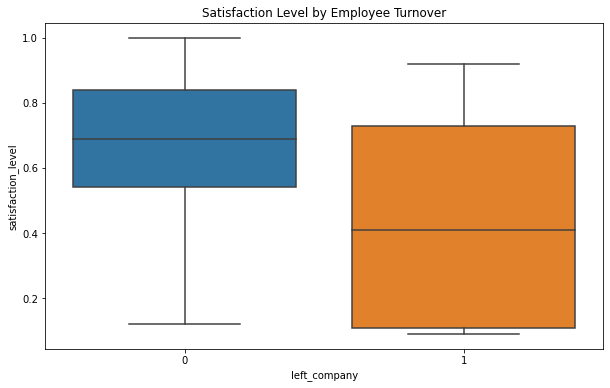

In [29]:
# Create a plot as needed
print("""Plot Type: Boxplot.
Purpose: To observe how satisfaction levels differ between employees who left and those who stayed.""")

# Plot 1: Relationship Between Satisfaction Level and Employee Turnover
plt.figure(figsize=(10, 6))
sns.boxplot(x='left_company', y='satisfaction_level', data=data_clean)
plt.title('Satisfaction Level by Employee Turnover')
plt.show()

Average Monthly Hours by Department:

Plot Type: Bar plot.
Purpose: To compare the workload across different departments.



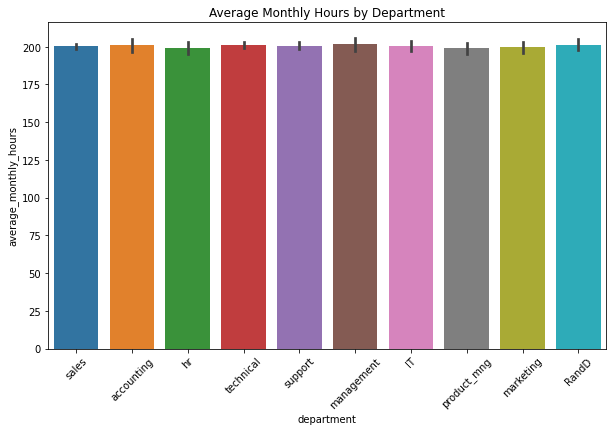

In [32]:
print("""Average Monthly Hours by Department:

Plot Type: Bar plot.
Purpose: To compare the workload across different departments.
"""
     )

# Plot 2: Average Monthly Hours by Department
plt.figure(figsize=(10, 6))
sns.barplot(x='department', y='average_monthly_hours', data=data_clean)
plt.title('Average Monthly Hours by Department')
plt.xticks(rotation=45)
plt.show()

Number of Projects by Employee Turnover:

Plot Type: Count plot.
Purpose: To see if there’s a trend in the number of projects handled by employees who left versus those who stayed.


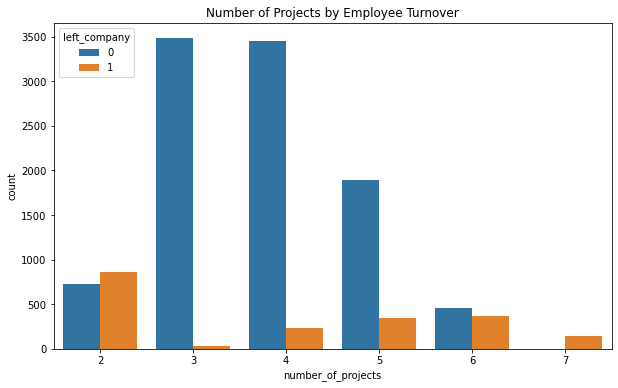

'Note: it appears as though employees with a low project load have a significant chance of churn'

In [43]:
print("""Number of Projects by Employee Turnover:

Plot Type: Count plot.
Purpose: To see if there’s a trend in the number of projects handled by employees who left versus those who stayed."""
     )
# Plot 3: Number of Projects by Employee Turnover
plt.figure(figsize=(10, 6))
sns.countplot(x='number_of_projects', hue='left_company', data=data_clean)
plt.title('Number of Projects by Employee Turnover')
plt.show()

"""Note: it appears as though employees with a low project load have a significant chance of churn"""

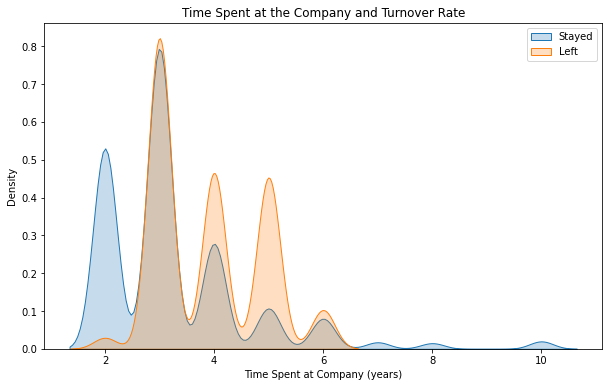

In [35]:
"""Time Spent at the Company and Turnover Rate:

Plot Type: Histogram or Kernel Density Estimate (KDE) plot.
Purpose: To understand if tenure at the company affects the likelihood of leaving."""

# Plot 4: Time Spent at the Company and Turnover Rate
plt.figure(figsize=(10, 6))
sns.kdeplot(data_clean[data_clean['left_company'] == 0]['time_spent_at_company'], label='Stayed', shade=True)
sns.kdeplot(data_clean[data_clean['left_company'] == 1]['time_spent_at_company'], label='Left', shade=True)
plt.title('Time Spent at the Company and Turnover Rate')
plt.xlabel('Time Spent at Company (years)')
plt.ylabel('Density')
plt.legend()
plt.show()


Salary Level and Employee Turnover:

Plot Type: Count plot.
Purpose: To explore whether salary levels are a significant factor in employee turnover.


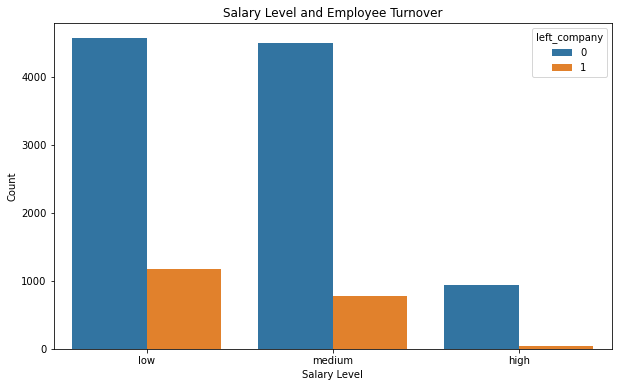

In [39]:
print("""Salary Level and Employee Turnover:

Plot Type: Count plot.
Purpose: To explore whether salary levels are a significant factor in employee turnover."""
     )

# Plot 5: Salary Level and Employee Turnover
plt.figure(figsize=(10, 6))
sns.countplot(x='salary', hue='left_company', data=data_clean, order=['low', 'medium', 'high'])
plt.title('Salary Level and Employee Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.show()



Correlation Heatmap of All Variables:

Plot Type: Heatmap.
Purpose: To visualize the correlation between all numerical variables in the dataset.


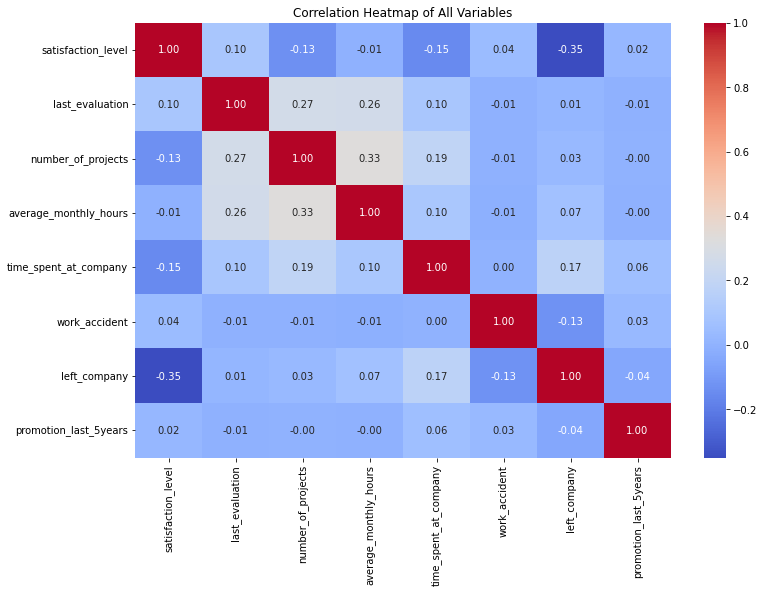

In [40]:
print("""Correlation Heatmap of All Variables:

Plot Type: Heatmap.
Purpose: To visualize the correlation between all numerical variables in the dataset.""")

# Plot 6: Correlation Heatmap of All Variables
plt.figure(figsize=(12, 8))
sns.heatmap(data_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Variables')
plt.show()


Employee Turnover by Department:

Plot Type: Bar plot.
Purpose: To identify which departments have higher turnover rates.


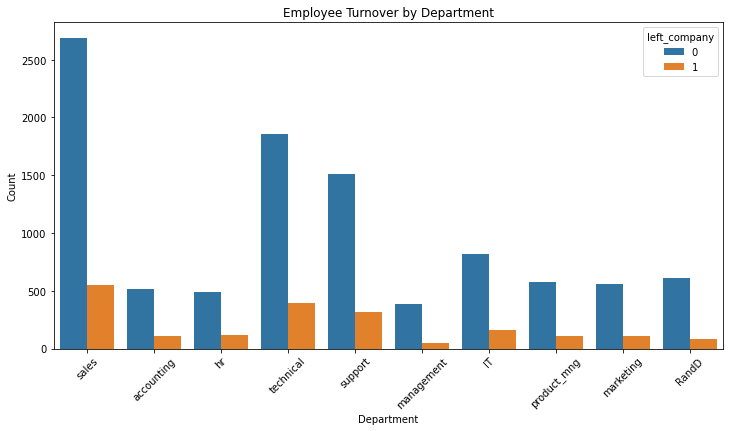

In [42]:
print("""Employee Turnover by Department:

Plot Type: Bar plot.
Purpose: To identify which departments have higher turnover rates.""")

# Plot 7: Employee Turnover by Department
plt.figure(figsize=(12, 6))
sns.countplot(x='department', hue='left_company', data=data_clean)
plt.title('Employee Turnover by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###


### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [ ]:
### YOUR CODE HERE ###


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.